# 1. data preprocessing

## 1) install and import all libraries we need

In [1]:
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install keras-tuner


In [2]:
!pip install opencv-python

In [3]:
!pip install tensorflow

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import os
from keras import models, layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from kerastuner import HyperModel

In [5]:
pwd # this is my module directory

'/Users/zhanwang/Downloads'

In [6]:
# this is my module directory
path = '/Users/zhanwang/Documents/plant-pathology-2020-fgvc7'

In [7]:
print(path)

/Users/zhanwang/Documents/plant-pathology-2020-fgvc7


In [8]:
# all the data from kaggle are stored inside under this folder
# [images sample_submission.csv, test.csv, train.csv]
source_path = os.path.join(path, 'source/')

In [9]:
print(source_path)

/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/source/


In [10]:
train = pd.read_csv(source_path + 'train.csv')

In [11]:
train.shape

(1821, 5)

In [12]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


## 2)preprocess data and split data into train/validation (80%/20%)

In [13]:
# add one column, diease,
def add_diseases(train):
    train['diseases'] = 0
    train.loc[train.healthy == 1, 'diseases'] = 'healthy'
    train.loc[train.multiple_diseases == 1, 'diseases'] = 'multiple_diseases'
    train.loc[train.rust == 1, 'diseases'] = 'rust'
    train.loc[train.scab == 1, 'diseases'] = 'scab'
    return train

In [14]:
train = add_diseases(train)
train

# for file in train:
#     print(file)

,image_id,healthy,multiple_diseases,rust,scab,diseases
0,Train_0,0,0,0,1,scab
1,Train_1,0,1,0,0,multiple_diseases
2,Train_2,1,0,0,0,healthy
3,Train_3,0,0,1,0,rust
4,Train_4,1,0,0,0,healthy
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,scab
1817,Train_1817,1,0,0,0,healthy
1818,Train_1818,1,0,0,0,healthy
1819,Train_1819,0,0,1,0,rust


In [15]:
def load_images(train):
    train_image = []
    for file in train['image_id']:
        image = source_path + 'images/' + file + '.jpg'
        img = cv2.imread(image)
        image = cv2.resize(img, (256, 256))
        train_image.append(image)
    train_image_array = np.array(train_image)
    
    return train_image_array

In [16]:
train_image = load_images(train)
train_image.shape

(1821, 256, 256, 3)

In [17]:
# get the disease name according image_firstname
def get_diseases_name(image_firstname):
    for i in range(len(train)):
        if train.loc[i, 'image_id'] == image_firstname:
            return train.loc[i, 'diseases']

scab


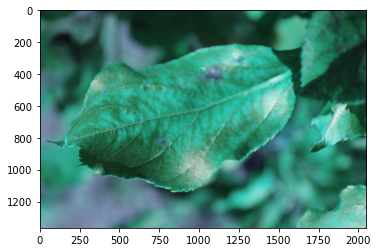

In [18]:
# demo
sample_image = cv2.imread(source_path + 'images/' + 'Train_0.jpg')
plt.imshow(sample_image)
print(get_diseases_name('Train_0'))

In [19]:
# we will copy all images to the fwllowing folders according to disease name
# data/train/[healthy, multiple_diseases, rust, scab], 
# data/valid/[healthy, multiple_diseases, rust, scab], 

#create data folder according to the data_path
import shutil
os.mkdir(os.path.join(path, 'data'))

data_path = os.path.join(path, 'data/')
print(data_path)

/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/data/


In [20]:
image_source_dir = os.path.join(source_path, 'images')
print(image_source_dir)


/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/source/images


In [21]:
def split_data(SOURCE, TRAIN, DATA, TRAIN_SIZE):
    import shutil
    
    # path of train and valid
    train_dir = os.path.join(DATA, 'train')
    valid_dir = os.path.join(DATA, 'valid')
#     test_dir = os.path.join(DATA, 'test')
    print('train path: ' + train_dir)
    print('valid path: ' + valid_dir)
#     print('test_dir path: ' + test_dir)
    print()
    
    #create train/test directories
    try:
      os.mkdir(train_dir)
      os.mkdir(valid_dir)
#       os.mkdir(test_dir)
    except OSError as error: 
      print(error) 
    
    # path of train and test file named with disease name
    train_dir_healthy = os.path.join(train_dir, 'healthy')
    train_dir_multiple_diseases = os.path.join(train_dir, 'multiple_diseases')
    train_dir_rust = os.path.join(train_dir, 'rust')
    train_dir_scab = os.path.join(train_dir, 'scab')
#     print('train_dir_healthy path: ' + train_dir_healthy)
#     print('train_dir_multiple_diseases path: ' + train_dir_multiple_diseases)
#     print('train_dir_rust path: ' + train_dir_rust)
#     print('train_dir_scab path: ' + train_dir_scab)
    
    valid_dir_healthy = os.path.join(valid_dir, 'healthy')
    valid_dir_multiple_diseases = os.path.join(valid_dir, 'multiple_diseases')
    valid_dir_rust = os.path.join(valid_dir, 'rust')
    valid_dir_scab = os.path.join(valid_dir, 'scab')
#     print('test_dir_healthy path: ' + test_dir_healthy)
#     print('test_dir_multiple_diseases path: ' + test_dir_multiple_diseases)
#     print('test_dir_rust path: ' + test_dir_rust)
#     print('test_dir_scab path: ' + test_dir_scab)

#     test_dir_healthy = os.path.join(test_dir, 'healthy')
#     test_dir_multiple_diseases = os.path.join(test_dir, 'multiple_diseases')
#     test_dir_rust = os.path.join(test_dir, 'rust')
#     test_dir_scab = os.path.join(test_dir, 'scab')
#     print('test_dir_healthy path: ' + test_dir_healthy)
#     print('test_dir_multiple_diseases path: ' + test_dir_multiple_diseases)
#     print('test_dir_rust path: ' + test_dir_rust)
#     print('test_dir_scab path: ' + test_dir_scab)

    # create subdirectories under train/test
    try:
      os.mkdir(train_dir_healthy)
      os.mkdir(train_dir_multiple_diseases)
      os.mkdir(train_dir_rust)
      os.mkdir(train_dir_scab)
      os.mkdir(valid_dir_healthy)
      os.mkdir(valid_dir_multiple_diseases)
      os.mkdir(valid_dir_rust)
      os.mkdir(valid_dir_scab)
#       os.mkdir(test_dir_healthy)
#       os.mkdir(test_dir_multiple_diseases)
#       os.mkdir(test_dir_rust)
#       os.mkdir(test_dir_scab)
    except OSError as error: 
      print(error)
    
    # a list contains all img files
    allFileNames = os.listdir(SOURCE)
#     print('path: ' + str(allFileNames))
#     print()
#     print(str(allFileNames))
#     print(allFileNames)

    #read all images
    for file in allFileNames:
      img = cv2.imread(os.path.join(SOURCE, file))
#       print(img)
#       print(img.shape)
    
    # split all data into train set and test set
#     train_ALL_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * (TRAIN_SIZE + VALID_SIZE))])
    
    train_FileNames, valid_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * (TRAIN_SIZE))])
    print('train_len = ' + str(len(train_FileNames)))
    print('valid_len = ' + str(len(valid_FileNames)))
#     print('test_len = ' + str(len(test_FileNames)))
    
    
    # 1821 train images
    for name in train_FileNames: # train0.jpg, train1.jpg
#       print('name = ' + name)
      image_info = name.split('.')
#       print(image_info)
      image_firstname = image_info[0]
#       print(image_firstname)
      image_disease = get_diseases_name(image_firstname)
#       print(image_disease)
      if image_disease is None:
        continue
#       print(os.path.join(SOURCE, name))
#       print(os.path.join(train_dir, image_disease, name))
      shutil.copy(os.path.join(SOURCE, name), os.path.join(train_dir, image_disease, name))
        
#     print('--------------')
    
    for name in valid_FileNames:
      image_info = name.split('.')
#       print(name)
      image_firstname = image_info[0]
#       print(image_firstname)
      image_disease = get_diseases_name(image_firstname)
#       print(image_disease)
      if image_disease is None:
        continue
      shutil.copy(os.path.join(SOURCE, name), os.path.join(valid_dir, image_disease, name))
    
#     for name in test_FileNames:
#       image_info = name.split('.')
# #       print(image_info)
#       image_firstname = image_info[0]
# #       print(image_firstname)
#       image_disease = get_diseases_name(image_firstname)
      
#       if image_disease is None:
#         continue
# #       print(image_firstname + '  ' + image_disease)
# #       print(os.path.join(test_dir, image_disease))
#       shutil.copy(os.path.join(SOURCE, name), os.path.join(test_dir, image_disease, name))
    
    
    print("Copying Done!")

In [22]:
train_size = .80
split_data(image_source_dir, train, data_path, train_size)

train path: /Users/zhanwang/Documents/plant-pathology-2020-fgvc7/data/train
valid path: /Users/zhanwang/Documents/plant-pathology-2020-fgvc7/data/valid

train_len = 2913
valid_len = 729
Copying Done!


In [23]:
train_path = os.path.join(path, 'data/', 'train/')
print(train_path)

/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/data/train/


In [24]:
valid_path = os.path.join(path, 'data/', 'valid/')
print(valid_path)

/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/data/valid/


In [25]:
# target path for all test images
test_data_path = os.path.join(path, 'data/','test/')
print(test_data_path)

/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/data/test/


In [26]:
# create dir for test
try:
  os.mkdir(test_data_path)
except OSError as error: 
  print(error)

In [27]:
test = pd.read_csv(source_path + 'test.csv')
test.shape

(1821, 1)

In [28]:
# do the copy
import shutil
for i in range(len(test)):
    firstname_test_image = test.loc[i, 'image_id']
#     print(firstname_test_image)
    image_source = os.path.join(image_source_dir, firstname_test_image + '.jpg')
#     print(image_source)
    shutil.copy(image_source, test_data_path)

print('All test images are copied into data/test')

All test images are copied into data/test


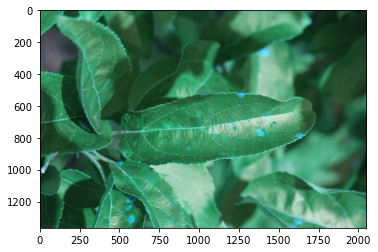

In [29]:
# demo
sample_image = cv2.imread(test_data_path + 'Test_0.jpg')
plt.imshow(sample_image)


# 2. data augmentation

In [30]:
#use ImageDataGenerator to do image augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = 0.2
)
#valid_data_gen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
# get all labels
LABELS = []
for catagory in os.listdir(train_path):
    LABELS.append(catagory)
print(LABELS)

['multiple_diseases', 'healthy', 'rust', 'scab']


In [32]:
#only apply augmentation to train and validation dataset
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (256,256), 
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              classes=LABELS,
                                              shuffle=True)
valid_set = train_datagen.flow_from_directory(valid_path,
                                              target_size = (256,256), 
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                             classes=LABELS,
                                              shuffle=True)

Found 1460 images belonging to 4 classes.
Found 361 images belonging to 4 classes.


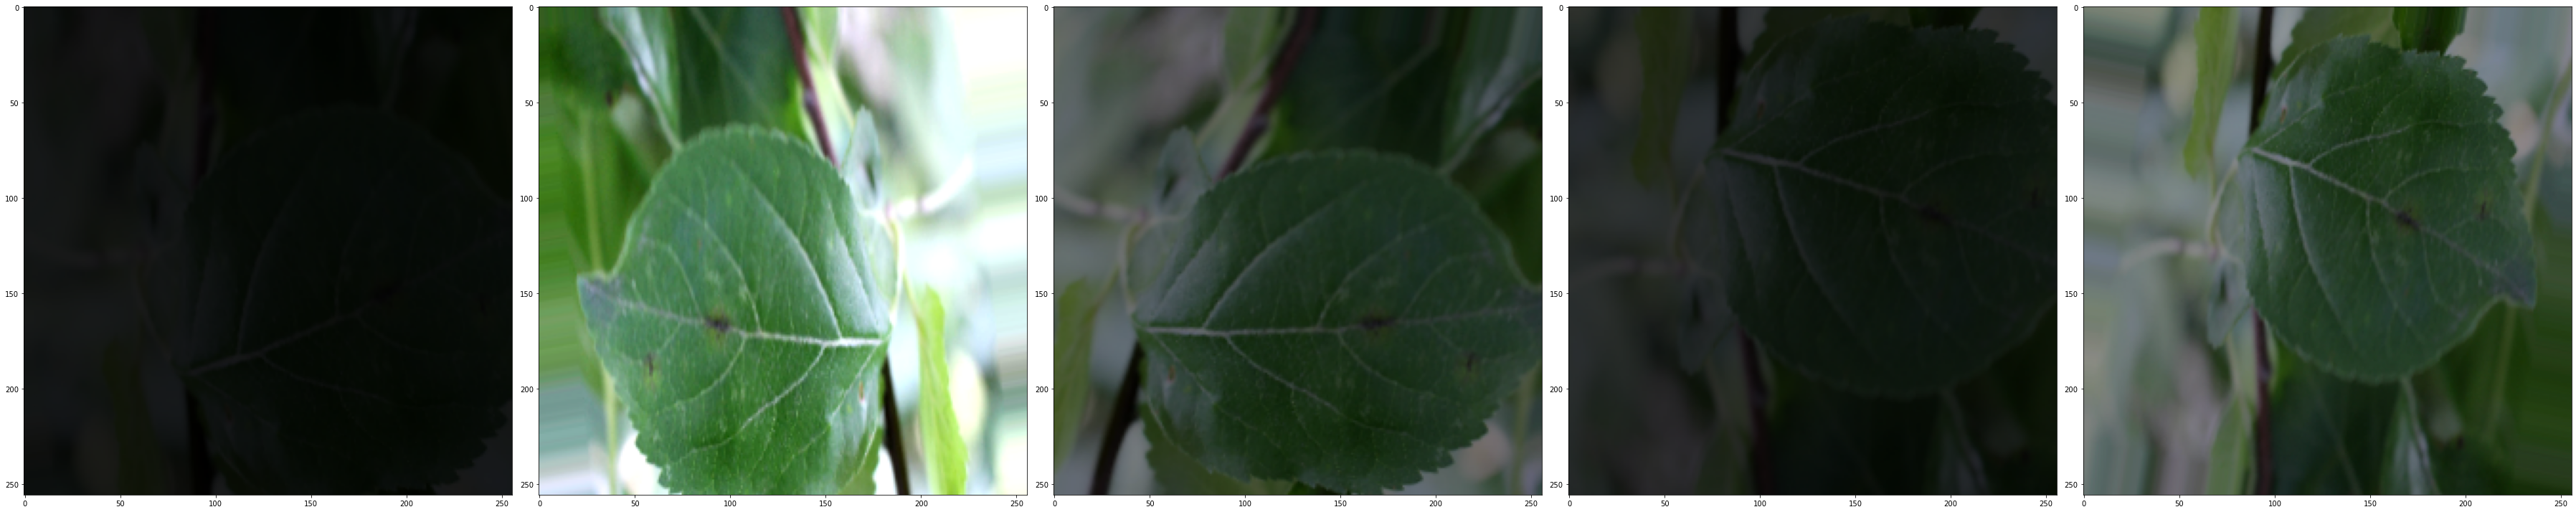

In [33]:
from keras.preprocessing.image import ImageDataGenerator
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(50,50))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_set[0][0][0] for i in range(5)]
plotImages(augmented_images)

# 3. use different models to do image classification(without hyperparameter tuning)

## 1) use base CNN model without dropout layer

In [34]:
#build cnn model without dropout layer
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
#model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(4, activation='softmax'))

model_cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [35]:
#compile and fit the cnn model
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history_cnn_1 = model_cnn.fit(
      train_set,
      epochs=20,
      validation_data=valid_set,
      )

Epoch 1/20
46/46 [==============================] - 132s 3s/step - loss: 1.3336 - accuracy: 0.3104 - val_loss: 1.2766 - val_accuracy: 0.3435
Epoch 2/20
46/46 [==============================] - 127s 3s/step - loss: 1.2575 - accuracy: 0.3429 - val_loss: 1.2389 - val_accuracy: 0.3186
Epoch 3/20
46/46 [==============================] - 123s 3s/step - loss: 1.2384 - accuracy: 0.3607 - val_loss: 1.2395 - val_accuracy: 0.3490
Epoch 4/20
46/46 [==============================] - 116s 3s/step - loss: 1.2516 - accuracy: 0.3332 - val_loss: 1.2452 - val_accuracy: 0.3518
Epoch 5/20
46/46 [==============================] - 114s 2s/step - loss: 1.2371 - accuracy: 0.3713 - val_loss: 1.2405 - val_accuracy: 0.3657
Epoch 6/20
46/46 [==============================] - 116s 3s/step - loss: 1.1947 - accuracy: 0.4028 - val_loss: 1.2585 - val_accuracy: 0.3684
Epoch 7/20
46/46 [==============================] - 118s 3s/step - loss: 1.2131 - accuracy: 0.3830 - val_loss: 1.2222 - val_accuracy: 0.3878
Epoch 8/20
46

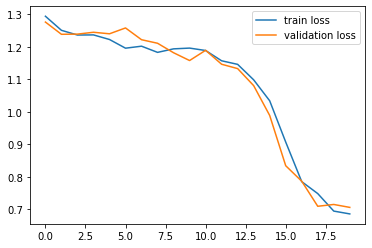

In [36]:
# use graph to show loss comparision(train vs validation)
plt.plot(history_cnn_1.history['loss'],label='train loss')
plt.plot(history_cnn_1.history['val_loss'],label='validation loss')

plt.legend()

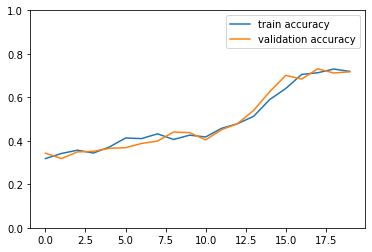

In [37]:
# use graph to show accuracy comparision(train vs validation)
plt.plot(history_cnn_1.history['accuracy'],label='train accuracy')
plt.plot(history_cnn_1.history['val_accuracy'],label='validation accuracy')
plt.ylim(0, 1)
plt.legend()

## 2) use base CNN model with dropout layer

In [38]:
#build cnn model with dropout layer
model_cnn_2 = models.Sequential()
model_cnn_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_cnn_2.add(layers.MaxPooling2D((2, 2)))
model_cnn_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_2.add(layers.MaxPooling2D((2, 2)))
model_cnn_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_2.add(layers.MaxPooling2D((2, 2)))
model_cnn_2.add(layers.Dropout(0.2))
model_cnn_2.add(layers.Flatten())
model_cnn_2.add(layers.Dense(128, activation='relu'))
model_cnn_2.add(layers.Dense(64, activation='relu'))
model_cnn_2.add(layers.Dense(4, activation='softmax'))

model_cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)       

In [39]:
#compile and train the model
model_cnn_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history_cnn_2 = model_cnn_2.fit(
      train_set,
      epochs=20,
      validation_data=valid_set,
      )

Epoch 1/20
46/46 [==============================] - 123s 3s/step - loss: 1.3024 - accuracy: 0.3364 - val_loss: 1.2087 - val_accuracy: 0.3906
Epoch 2/20
46/46 [==============================] - 123s 3s/step - loss: 1.2352 - accuracy: 0.3889 - val_loss: 1.2750 - val_accuracy: 0.3324
Epoch 3/20
46/46 [==============================] - 120s 3s/step - loss: 1.2046 - accuracy: 0.3962 - val_loss: 1.1783 - val_accuracy: 0.4432
Epoch 4/20
46/46 [==============================] - 118s 3s/step - loss: 1.1792 - accuracy: 0.4365 - val_loss: 1.1916 - val_accuracy: 0.3989
Epoch 5/20
46/46 [==============================] - 118s 3s/step - loss: 1.1644 - accuracy: 0.4399 - val_loss: 1.1612 - val_accuracy: 0.4432
Epoch 6/20
46/46 [==============================] - 118s 3s/step - loss: 1.1533 - accuracy: 0.4781 - val_loss: 1.1515 - val_accuracy: 0.4737
Epoch 7/20
46/46 [==============================] - 121s 3s/step - loss: 1.0512 - accuracy: 0.5817 - val_loss: 0.9721 - val_accuracy: 0.5928
Epoch 8/20
46

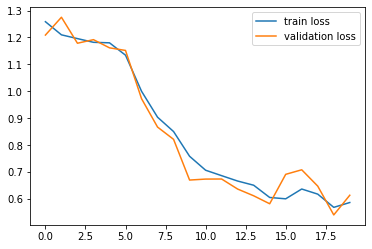

In [40]:
# use graph to show loss comparision(train vs validation)
plt.plot(history_cnn_2.history['loss'],label='train loss')
plt.plot(history_cnn_2.history['val_loss'],label='validation loss')

plt.legend()

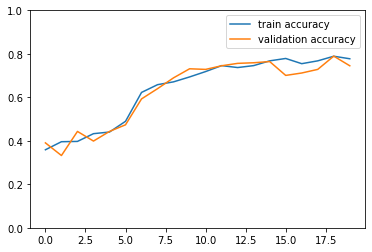

In [41]:
# use graph to show accuracy comparision(train vs validation)
plt.plot(history_cnn_2.history['accuracy'],label='train accuracy')
plt.plot(history_cnn_2.history['val_accuracy'],label='validation accuracy')
plt.ylim(0, 1)
plt.legend()

## 3) use vgg16 model(without dropout layer) to do image classification
### reference: https://neurohive.io/en/popular-networks/vgg16/#:~:text=VGG16%20is%20a%20convolutional%20neural%20network%20model%20proposed%20by%20K.&text=Zisserman%20from%20the%20University%20of,images%20belonging%20to%201000%20classes.

In [42]:
from keras.applications.vgg16 import VGG16

# build model base on the vgg16
base_model = VGG16(weights='imagenet',input_shape=(256,256,3),include_top=False)
base_model.trainable = False
model_vgg16 = models.Sequential()
model_vgg16.add(base_model)
# add more layers
model_vgg16.add(layers.Flatten())
model_vgg16.add(Dense(128,activation='relu'))
model_vgg16.add(Dense(64,activation='relu'))
model_vgg16.add(BatchNormalization())
model_vgg16.add(layers.Dense(4, activation='softmax'))

model_vgg16.layers[0].trainable = False

#loss function
sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

# compile the model
model_vgg16.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,   # 'adam',
    metrics=['accuracy']
)


model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
Total params: 18,917,892
Trainable params: 4,203,076
Non-trainable params: 14,714,816
__________________________________

In [43]:
#train the model
history_vgg = model_vgg16.fit(
      train_set,
      epochs=20,
      validation_data=valid_set,
      )

Epoch 1/20
46/46 [==============================] - 504s 11s/step - loss: 1.3906 - accuracy: 0.3798 - val_loss: 2.5395 - val_accuracy: 0.4432
Epoch 2/20
46/46 [==============================] - 502s 11s/step - loss: 1.0187 - accuracy: 0.6049 - val_loss: 2.1984 - val_accuracy: 0.4598
Epoch 3/20
46/46 [==============================] - 501s 11s/step - loss: 0.9688 - accuracy: 0.6554 - val_loss: 1.2349 - val_accuracy: 0.4958
Epoch 4/20
46/46 [==============================] - 500s 11s/step - loss: 0.8949 - accuracy: 0.6372 - val_loss: 1.2831 - val_accuracy: 0.4931
Epoch 5/20
46/46 [==============================] - 508s 11s/step - loss: 0.8537 - accuracy: 0.6627 - val_loss: 1.2476 - val_accuracy: 0.4404
Epoch 6/20
46/46 [==============================] - 550s 12s/step - loss: 0.8378 - accuracy: 0.6830 - val_loss: 0.9781 - val_accuracy: 0.5983
Epoch 7/20
46/46 [==============================] - 610s 13s/step - loss: 0.8061 - accuracy: 0.6738 - val_loss: 1.8691 - val_accuracy: 0.3878
Epoch 

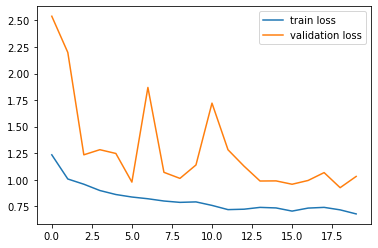

In [44]:
# use graph to show loss comparision(train vs validation)
plt.plot(history_vgg.history['loss'],label='train loss')
plt.plot(history_vgg.history['val_loss'],label='validation loss')

plt.legend()

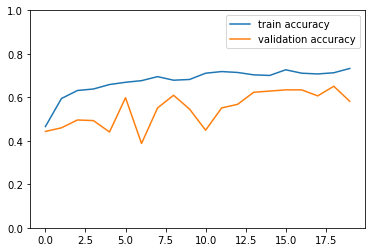

In [45]:
# use graph to show accuracy comparision(train vs validation)
plt.plot(history_vgg.history['accuracy'],label='train accuracy')
plt.plot(history_vgg.history['val_accuracy'],label='validation accuracy')
plt.ylim(0, 1)
plt.legend()

## 4) use vgg16 model with dropout layer

In [46]:
model_vgg16_2 = models.Sequential()
model_vgg16_2.add(base_model)
# add more layers
model_vgg16_2.add(layers.Flatten())
model_vgg16_2.add(Dense(128,activation='relu'))
model_vgg16_2.add(Dense(64,activation='relu'))
model_vgg16_2.add(Dropout(0.1))
model_vgg16_2.add(BatchNormalization())
model_vgg16_2.add(layers.Dense(4, activation='softmax'))

model_vgg16_2.layers[0].trainable = False

model_vgg16_2.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,   # 'adam',
    metrics=['accuracy']
)


model_vgg16_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [47]:
#train the model
history_vgg_2 = model_vgg16_2.fit(
      train_set,
      epochs=20,
      validation_data=valid_set,
      )

Epoch 1/20
46/46 [==============================] - 566s 12s/step - loss: 1.5521 - accuracy: 0.2657 - val_loss: 1.2305 - val_accuracy: 0.3518
Epoch 2/20
46/46 [==============================] - 628s 14s/step - loss: 1.3755 - accuracy: 0.3584 - val_loss: 1.2049 - val_accuracy: 0.4266
Epoch 3/20
46/46 [==============================] - 679s 15s/step - loss: 1.2249 - accuracy: 0.4387 - val_loss: 2.1558 - val_accuracy: 0.3380
Epoch 4/20
46/46 [==============================] - 657s 14s/step - loss: 1.1369 - accuracy: 0.5031 - val_loss: 1.6598 - val_accuracy: 0.1717
Epoch 5/20
46/46 [==============================] - 597s 13s/step - loss: 1.0624 - accuracy: 0.5501 - val_loss: 2.1526 - val_accuracy: 0.0499
Epoch 6/20
46/46 [==============================] - 485s 11s/step - loss: 1.0745 - accuracy: 0.5403 - val_loss: 1.4605 - val_accuracy: 0.3352
Epoch 7/20
46/46 [==============================] - 487s 11s/step - loss: 1.0762 - accuracy: 0.5289 - val_loss: 1.8586 - val_accuracy: 0.3130
Epoch 

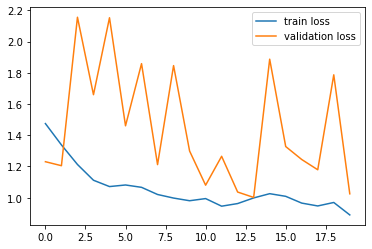

In [48]:
# use graph to show loss comparision(train vs validation)
plt.plot(history_vgg_2.history['loss'],label='train loss')
plt.plot(history_vgg_2.history['val_loss'],label='validation loss')

plt.legend()

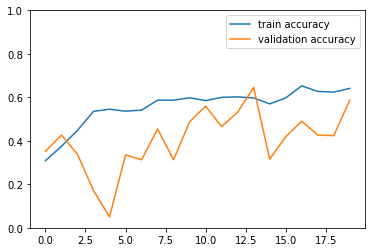

In [49]:
# use graph to show accuracy comparision(train vs validation)
plt.plot(history_vgg_2.history['accuracy'],label='train accuracy')
plt.plot(history_vgg_2.history['val_accuracy'],label='validation accuracy')
plt.ylim(0, 1)
plt.legend()

### we can see that the cnn model without dropout layer has the best performance, so we can use it to do hyperparameter tuning to improve our accuracy.

# 4. Hypermarameter Tuning

In [59]:
 
class CNNHyperModel(HyperModel):
    def _init_(self, num_classes):
        self.num_classes = num_classes
    def build(self, hp):
        model_cnn_hp = models.Sequential()
        model_cnn_hp.add(
            layers.Conv2D(
                32,
                (3,3),
                activation='relu',
                input_shape=(256, 256, 3)  
            )  
        )
        model_cnn_hp.add(layers.MaxPooling2D((2, 2)))
        model_cnn_hp.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model_cnn_hp.add(layers.MaxPooling2D((2, 2)))
        model_cnn_hp.add(
            layers.Conv2D(
                filters=hp.Choice(
                    'num_filters',
                    values=[32, 64],
                    default=64,
                ),
                kernel_size=(3,3),
                activation='relu'
            )
        )
        model_cnn_hp.add(layers.MaxPooling2D((2, 2)))
        model_cnn_hp.add(layers.Dropout(0.2))
        model_cnn_hp.add(layers.Flatten())
        model_cnn_hp.add(
            layers.Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=512,
                    step=160,
                    default=192
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'sigmoid'],
                    default='relu'
                )
            )
        )
        model_cnn_hp.add(layers.Dense(64, activation='relu'))
        model_cnn_hp.add(layers.Dense(4, activation='softmax'))
        model_cnn_hp.summary()
        
        #compile and fit the cnn model
        model_cnn_hp.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
        return model_cnn_hp
hypermodel = CNNHyperModel(4)

In [62]:
from kerastuner.tuners import Hyperband
HYPERBAND_MAX_EPOCHS = 20
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 1
SEED=1

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_accuracy',
    seed=SEED,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='test',
    overwrite=True
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0

In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_filters (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
units (Int)
{'default': 192, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 160, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}


In [64]:
N_EPOCH_SEARCH = 10
tuner.search(train_set, validation_data=valid_set, epochs=N_EPOCH_SEARCH)

Trial 21 Complete [00h 12m 56s]
val_accuracy: 0.3407202363014221

Best val_accuracy So Far: 0.7340720295906067
Total elapsed time: 03h 05m 57s
INFO:tensorflow:Oracle triggered exit


In [71]:
# Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
best_model_cnn = tuner.get_best_models(num_models=1)[0]


Results summary
Results in hyperband/test
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_filters: 64
units: 192
dense_activation: sigmoid
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: fc86239a12bf79b9089d2effa6f2792e
Score: 0.7340720295906067
Trial summary
Hyperparameters:
num_filters: 64
units: 192
dense_activation: sigmoid
tuner/epochs: 7
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: fa3a530ea5548c14cedbb3b381031936
Score: 0.5900276899337769
Trial summary
Hyperparameters:
num_filters: 64
units: 32
dense_activation: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.48753461241722107
Trial summary
Hyperparameters:
num_filters: 64
units: 32
dense_activation: relu
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 189f01a3d50f3ff994f9fec2b9efaa8c
Score: 0.4487534761428833
Trial summary
Hyperpa

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for hyperband/test/trial_4397d359438c52e18d194d4d8a172c33/checkpoints/epoch_0/checkpoint

# 5. Best CNN model predictions for the test set

In [72]:
test = pd.read_csv(source_path + 'test.csv')
test.image_id = test.image_id.apply(lambda x: x+'.jpg')
test.head()

,image_id
0,Test_0.jpg
1,Test_1.jpg
2,Test_2.jpg
3,Test_3.jpg
4,Test_4.jpg


In [73]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/source/images",
x_col="image_id",
y_col=None,
batch_size=16,
seed=42,
shuffle=False,
    
class_mode=None, 
target_size=(256, 256)

)

Found 1821 validated image filenames.


In [78]:
pred = best_model_cnn.predict(test_generator, verbose = 1)

114/114 [==============================] - 82s 715ms/step


In [79]:
SUB_PATH = "/Users/zhanwang/Documents/plant-pathology-2020-fgvc7/source/sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
sub.loc[:, 'healthy':] = pred
sub.to_csv('Submission_2.csv', index=False)
sub.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.096149,8.757750e-03,0.887817,0.007277
1,Test_1,0.107260,7.343045e-03,0.880118,0.005279
2,Test_2,0.036778,3.412156e-01,0.008169,0.613837
3,Test_3,0.006763,8.441761e-01,0.004795,0.144266
4,Test_4,0.037938,2.949687e-07,0.962060,0.000001
